## Линейная регрессия

In [2]:
import numpy as np
import operator
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
%matplotlib inline

In [3]:
from sklearn.linear_model import LinearRegression # линейная регрессия

### Практика на собственном датасете

In [1]:
from sklearn.metrics import mean_squared_error, r2_score # подгружаем метрику mse и r2
from sklearn.preprocessing import PolynomialFeatures

In [31]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20) # заданы параметры при степенях

# преобразуем данный чтобы добавить новые оси
x = x[:, np.newaxis]
y = y[:, np.newaxis]

In [32]:
x.shape

(20, 1)

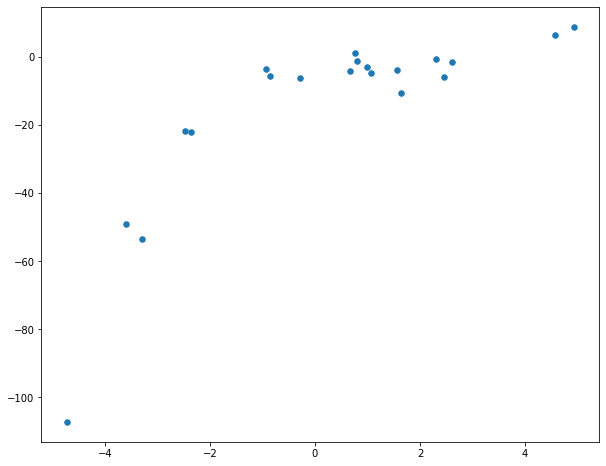

In [33]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=30);

In [34]:
model = LinearRegression() 
model.fit(x, y)

LinearRegression()

In [35]:
model.coef_, model.intercept_

(array([[8.29238755]]), array([-16.79645067]))

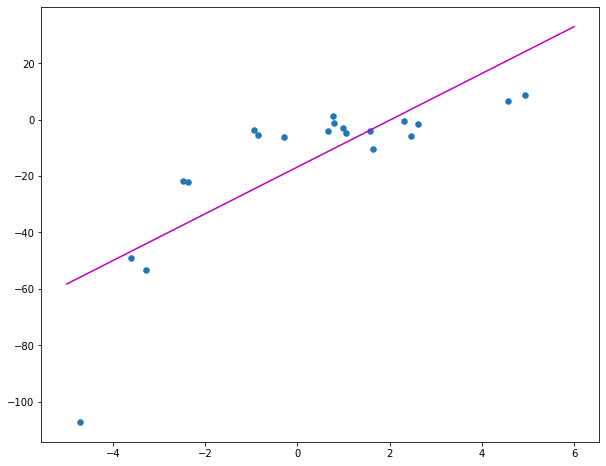

In [36]:
plt.figure(figsize=(10, 8))

line_x = np.arange(-5, 7)
line_y = np.squeeze(model.coef_ * line_x + model.intercept_)
plt.plot(line_x, line_y, color='m')
plt.scatter(x, y, s=30);

In [37]:
pred = model.predict(x)
pred

array([[-44.09629271],
       [-10.16645153],
       [-24.5598996 ],
       [-55.95874018],
       [-46.67121946],
       [ 24.10022521],
       [-23.84717967],
       [  3.55366232],
       [  2.35611659],
       [-10.42620129],
       [ -3.79507092],
       [-36.38987415],
       [-19.14413485],
       [ -3.23860475],
       [-11.25373341],
       [ -8.51254609],
       [-37.38012369],
       [  4.89207993],
       [ -7.99991171],
       [ 21.03580306]])

In [38]:
x[0] * model.coef_ + model.intercept_

array([[-44.09629271]])

In [39]:
y[0]

array([-53.46841187])

In [40]:
# считаем метрику RMSE и R2
rmse = np.sqrt(mean_squared_error(y, pred, ))
r2 = r2_score(y, pred)
print('RMSE:', rmse)
print('R2:', r2)

RMSE: 15.908242501429998
R2: 0.6386750054827146


#### Полиномиальная регрессия

<p>Видим, что линейная модель описывает наши данные не очень хорошо. Это можно понять и по MSE, R2, и исходя из графика. Попробуем построить полиномиальную регрессию.</p>

In [41]:
# pd.DataFrame({
#     'a': [2],
#     'b': [3]
# })

In [42]:
# degree = 2

# 1, 2, 4, 6, 9

In [43]:
# sklearn генерирует допольнительное кол-во признаков для полиномиальной регресии
polynomial_features = PolynomialFeatures(degree=2) # указываем вторую степень полинома
x_poly = polynomial_features.fit_transform(x) # получаем новые признаки

In [44]:
x_poly

array([[ 1.        , -3.29215704, 10.83829796],
       [ 1.        ,  0.79952837,  0.63924562],
       [ 1.        , -0.93621395,  0.87649656],
       [ 1.        , -4.7226796 , 22.30370258],
       [ 1.        , -3.60267397, 12.97925974],
       [ 1.        ,  4.93183364, 24.32298305],
       [ 1.        , -0.85026525,  0.722951  ],
       [ 1.        ,  2.45407162,  6.02246754],
       [ 1.        ,  2.30965656,  5.3345134 ],
       [ 1.        ,  0.76820449,  0.59013814],
       [ 1.        ,  1.56786929,  2.4582141 ],
       [ 1.        , -2.36282052,  5.58292081],
       [ 1.        , -0.28311318,  0.08015307],
       [ 1.        ,  1.63497495,  2.67314309],
       [ 1.        ,  0.6684103 ,  0.44677233],
       [ 1.        ,  0.99897702,  0.99795508],
       [ 1.        , -2.48223722,  6.16150161],
       [ 1.        ,  2.61547479,  6.84070838],
       [ 1.        ,  1.0607969 ,  1.12529005],
       [ 1.        ,  4.56228722, 20.81446466]])

RMSE: 10.120437473614711
R2: 0.8537647164420812


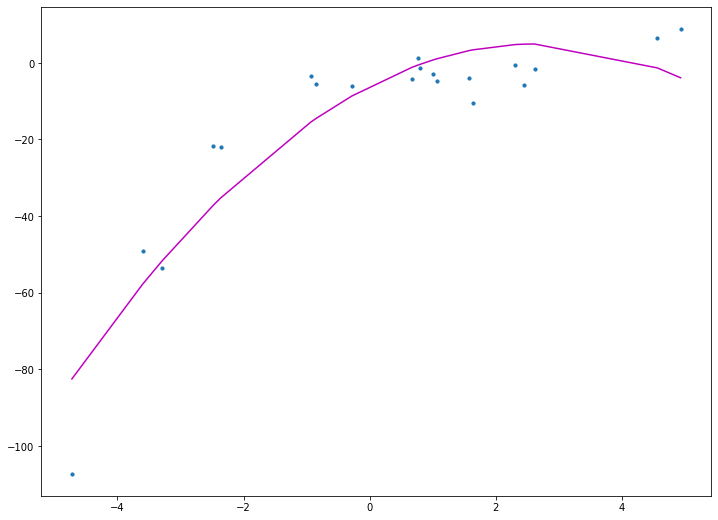

In [45]:
# теперь подаем эти признаки в линейную регресиию
# и проделаем все те же самые операции
model = LinearRegression() 
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
plt.figure(figsize=(12,9))


rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r2 = r2_score(y, y_poly_pred)
print('RMSE:', rmse)
print('R2:', r2)
plt.scatter(x, y, s=10)

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
x_, y_poly_pred = zip(*sorted_zip)

plt.plot(x_, y_poly_pred, color='m')
plt.show()

<p>Проделаем то же самое, например, для 3 степени.</p>

RMSE: 3.449895507408725
R2: 0.9830071790386679


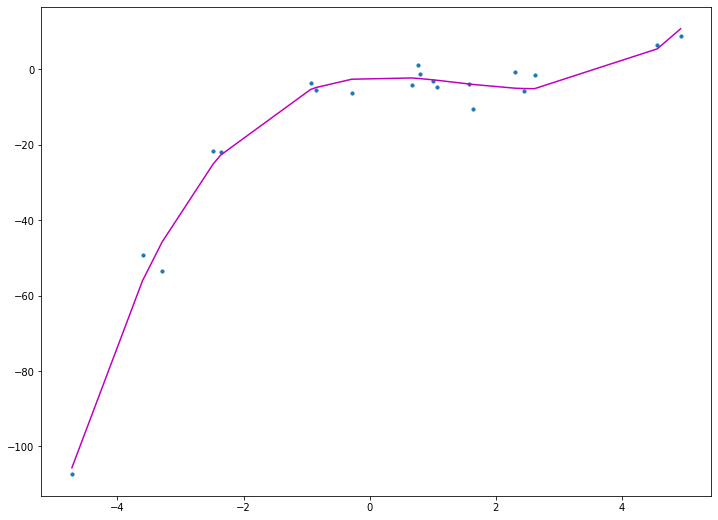

In [46]:
polynomial_features = PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression() 
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
plt.figure(figsize=(12,9))


rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r2 = r2_score(y, y_poly_pred)
print('RMSE:', rmse)
print('R2:', r2)
plt.scatter(x, y, s=10)

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
x_, y_poly_pred = zip(*sorted_zip)

plt.plot(x_, y_poly_pred, color='m')
plt.show()

In [47]:
model.coef_

array([[ 0.        ,  0.99141388, -2.10330137,  0.49338043]])

<p>Видим, что с увеличением степени MSE и R2 упали до приемлемых значений, и наша модель достаточно хорошо описывается 3 степенью. Но стоит помнить, что чем больше мы задаём степень полинома, тем точнее полином будет накладываться на значения, и модель будет переобучаться, поэтому с этим надо быть осторожным. О переобучении речь будет идти в следующих уроках.</p>

## Логистическая регрессия

In [22]:
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [50]:
X, y = datasets.make_classification(n_samples=100, 
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    random_state=19)
X

array([[ 0.94111613,  0.90354464],
       [-0.87876469,  0.69049739],
       [ 0.48628889, -1.20009558],
       [ 0.9741838 ,  1.37293162],
       [ 0.13166982,  1.36053924],
       [ 1.3175149 , -1.13712247],
       [-0.98695935,  1.13671295],
       [-1.4380817 , -1.44909964],
       [-1.21150543, -0.98211353],
       [ 1.6967232 , -0.67068973],
       [-2.19619506, -0.16802132],
       [-0.33191661,  2.51133013],
       [-1.39152682,  0.58132381],
       [ 1.62634658, -0.72160068],
       [-1.44778389,  0.6362001 ],
       [ 0.59543274, -0.57022956],
       [ 0.17305019,  1.5506415 ],
       [-1.032156  , -1.47096612],
       [-2.51658988, -0.47515337],
       [-0.03157871,  1.60621281],
       [-1.1463689 , -0.91895586],
       [ 0.251064  ,  1.8901038 ],
       [-1.41704655, -1.03377   ],
       [-0.81193877,  0.79954416],
       [ 0.33603119,  1.47143505],
       [-2.01295445, -0.04293602],
       [-0.67783746, -0.42125072],
       [ 1.45131981, -0.88631373],
       [-1.74766329,

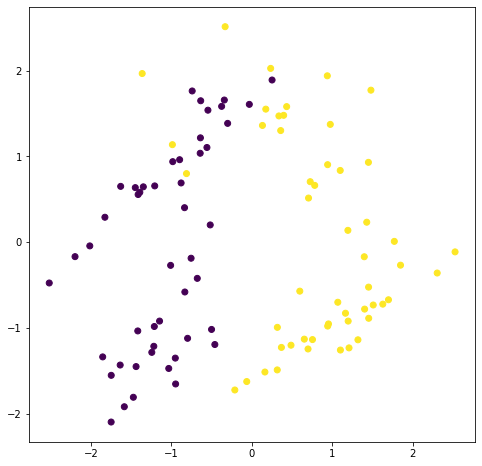

In [51]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:,0], X[:, 1], c=y);

In [52]:
model = LogisticRegression() 

model.fit(X, y)

LogisticRegression()

In [53]:
model.coef_

array([[ 2.68436118, -0.03350121]])

In [ ]:
model.score(X, y)

0.94

In [ ]:
model.predict(X)

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
model.predict_proba(X)

array([[4.36681625e-02, 9.56331838e-01],
       [8.57122644e-01, 1.42877356e-01],
       [1.26083595e-01, 8.73916405e-01],
       [4.07175561e-02, 9.59282444e-01],
       [2.89393895e-01, 7.10606105e-01],
       [1.52886065e-02, 9.84711393e-01],
       [8.90608983e-01, 1.09391017e-01],
       [9.61628905e-01, 3.83710945e-02],
       [9.32689508e-01, 6.73104918e-02],
       [5.66624267e-03, 9.94333757e-01],
       [9.95029698e-01, 4.97030226e-03],
       [5.94995761e-01, 4.05004239e-01],
       [9.59471443e-01, 4.05285567e-02],
       [6.82485437e-03, 9.93175146e-01],
       [9.65015142e-01, 3.49848583e-02],
       [9.90415393e-02, 9.00958461e-01],
       [2.68343996e-01, 7.31656004e-01],
       [8.93874254e-01, 1.06125746e-01],
       [9.97869058e-01, 2.13094174e-03],
       [3.88913593e-01, 6.11086407e-01],
       [9.21000724e-01, 7.89992757e-02],
       [2.31282154e-01, 7.68717846e-01],
       [9.60027580e-01, 3.99724204e-02],
       [8.34223756e-01, 1.65776244e-01],
       [1.910512

In [54]:
import numpy as np
import matplotlib.pyplot as plt

<p>Так разделяет регрессия:</p>

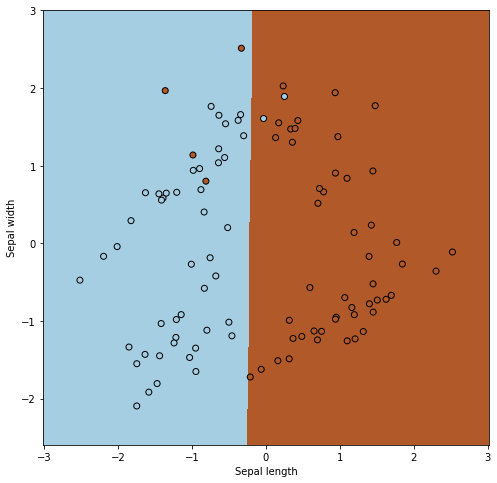

In [55]:
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5

h = .01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,8))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show()

#### Полиномиальная регрессия

In [72]:
pipe = make_pipeline(PolynomialFeatures(degree=5), LogisticRegression())

In [73]:
pipe.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('logisticregression', LogisticRegression())])

In [74]:
pipe.predict(X)

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0])

In [75]:
pipe.score(X, y)

0.96

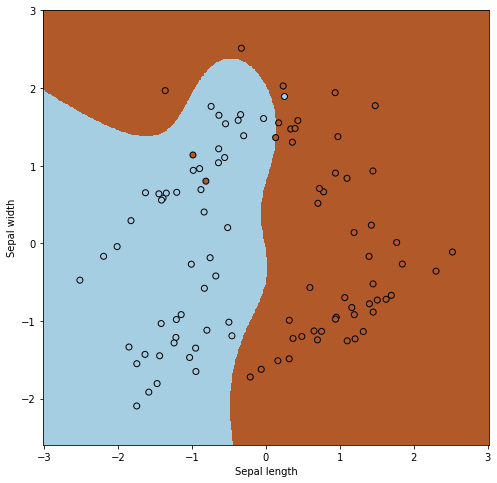

In [76]:
Z = pipe.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,8))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show()

# Практическое задание

#### Fashion MNIST

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
X_train = tf.image.resize(X_train[..., np.newaxis], (14, 14))[..., 0]
X_test = tf.image.resize(X_test[..., np.newaxis], (14, 14))[..., 0]

In [ ]:
X_train.shape

TensorShape([60000, 14, 14])

In [ ]:
X_test.shape

TensorShape([10000, 14, 14])

In [ ]:
X_train = X_train[:1000]
y_train = y_train[:1000]

X_test = X_test[:100]
y_test = y_test[:100]

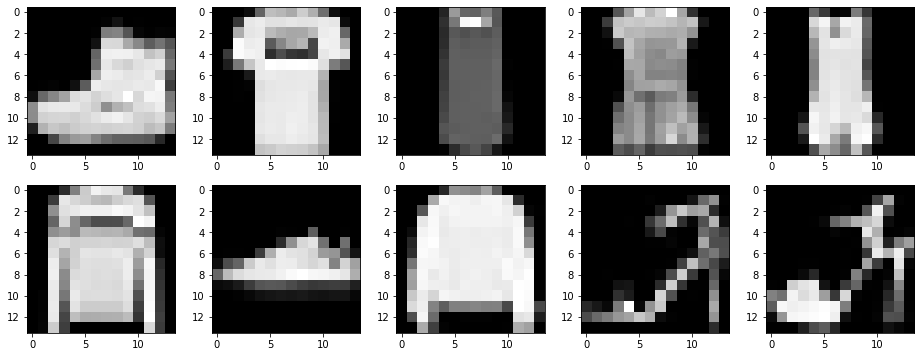

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i,:], cmap='gray')

In [ ]:
X_train = X_train.numpy()
X_test = X_test.numpy()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

X_train.shape

(1000, 196)

## Обучение линейной модели

## Валидация

## Улучшение качества с помощью полиномиальной модели

## Валидация

## Сделайте выводы

# Дополнительные материалы
1. Масштабирование данных https://youtu.be/XsuCOfpf8Ic
2. Реализация линейной регрессии https://youtu.be/KJA9A1q9l7E
